## ***DBSCAN Kumeleme Algoritmasi***

Bu ödevde, UC Irvine Machine Learning Repository'de bulunan [kalp hastalığı veri seti](http://archive.ics.uci.edu/ml/datasets/Heart+Disease)yle çalışacaksınız.
- Değişik eps ve min_samples değerleri deneyerek DBSCAN metodunu uygulayın. İki kümeli çözüm üretmenin pek kolay olmadığını göreceksiniz.

- eps = 1, min_samples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, min_samples değerini artırın. Artışın kümelerin sayısı üzerindeki etkisi nedir?

- eps = 1, min_samples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, eps değerini artırın. Artışın kümelerin sayısı üzerindeki etkisi nedir?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

- Veri seti kümeleme algoritmasına geçmeden önce bazı işlemlere ihtiyaç duymaktadır.

#### Preprocessing

In [2]:
# birden fazla dosyayi okuma
import glob

path = r'./data' # use your path
all_files = glob.glob(path + "/processed*.data")

li = []

for filename in all_files:
    df = pd.read_csv(filename,header=0)
    # sutun isimlerini ayni yapiyoruz ki concat etmede sutun sayimiz artmasin
    # farkli isimdeki sutunlar olusmasin
    df.columns = [x for x in range(14)]
    li.append(df)

heart = pd.concat(li, axis=0, ignore_index=True)

In [3]:
heart

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,34.0,1.0,4.0,115,0,?,?,154,0,.2,1,?,?,1
1,35.0,1.0,4.0,?,0,?,0,130,1,?,?,?,7,3
2,36.0,1.0,4.0,110,0,?,0,125,1,1,2,?,6,1
3,38.0,0.0,4.0,105,0,?,0,166,0,2.8,1,?,?,2
4,38.0,0.0,4.0,110,0,0,0,156,0,0,2,?,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,45.0,1.0,1.0,110,264,0,0,132,0,1.2,2,0.0,7.0,1
912,68.0,1.0,4.0,144,193,1,0,141,0,3.4,2,2.0,7.0,2
913,57.0,1.0,4.0,130,131,0,0,115,1,1.2,2,1.0,7.0,3
914,57.0,0.0,2.0,130,236,0,2,174,0,0,2,1.0,3.0,1


In [4]:
heart.to_csv('data/all_data.csv', index=False)

- Burada, X sizin özellikleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, o zaman buna karşılık gelen hastanın kalp hastalığı olduğunu ve y'nin 0'a eşit olması durumunda, hastanın kalp hastalığı olmadığı anlaşılacaktır.

In [5]:
# Veri setini kullanmadan önce bazı ön işlemler yapmanız gerekiyor:

# Define the features and the outcome
X = heart.iloc[:, :13]
y = heart.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

- Kümeleme algoritmalalarının çoğu değişkenlerin ölçeklerine duyarlı olduklarından değişkenleri standartlaştırıyoruz

In [6]:
# kümeleme algoritmalalarının çoğu değişkenlerin ölçeklerine duyarlı olduklarından 
# değişkenleri standartlaştırıyoruz
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

---
#### ***Clustering***
- Iki kumeli cozume ulasmak icin degisik parametrelerle kumeleme yapilip siluet skorlari hesaplanabilir. 

In [7]:
# epsilon ve min samples parametreleri ile kumeleme nesnesi olustur
dbscan_cluster = DBSCAN(eps=1, min_samples=3)

clusters = dbscan_cluster.fit_predict(X_std)

In [8]:
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

DBSCAN çözümünün siluet skoru: -0.2681217577872697


In [ ]:
# her bir noktanin siluet skoru
metrics.silhouette_samples(X_std, clusters)

- Kume sayisini ogrenmek icin:

In [10]:
def get_cluster_n(clusters):
    # noise degerler varsa onlari kumeden saymayiz
    if -1 in np.unique(clusters):
        return len(np.unique(clusters))-1
    else:
        return len(np.unique(clusters))  

- Kumeleme yapan ve skorlari donduren fonksiyon.

In [32]:
def cluster_n_score(epsilon=1, min_samples=5):
    # epsilon ve min samples parametreleri ile kumeleme nesnesi olustur
    dbscan_cluster = DBSCAN(eps=epsilon, min_samples=min_samples)
    clusters = dbscan_cluster.fit_predict(X_std)
    cluster_n = get_cluster_n(clusters)
    ari_score = metrics.adjusted_rand_score(y, clusters)
    #kume sayisi bire ya da sifira dustugunde siluet skor hata veriyor
    if cluster_n > 1:
        siluet_score = metrics.silhouette_score(X_std, clusters, metric='euclidean')
        siluet_samples = metrics.silhouette_samples(X_std, clusters)
    # kume sayisi 1 ya da sifir yani hepsi noise ise siluet skoru -1 yap
    else:
        siluet_score = -1
        siluet_samples = []
    # siluet skorunu don
    return ari_score, siluet_score, siluet_samples, cluster_n  

In [14]:
cluster_n_score(1,20)

(0.0, -1, [], 0)

In [43]:
best_siluet_score = 0
best_eps = 1
best_min_samples = 5
best_cluster_n = 1
best_siluet_sample = []
for e in np.arange(1,4,0.5):
    for m in range(3,20):
        _, siluet_score, siluet_sample, cluster_n = cluster_n_score(e,m)
        if siluet_score>best_siluet_score:
            best_siluet_score = siluet_score
            best_eps = e
            best_min_samples = m
            best_cluster_n = cluster_n
            best_siluet_sample = siluet_sample
      
print('En iyi siluet skoru  : {}'.format(best_siluet_score))
print('En iyi epsilon       : {}'.format(best_eps))   
print('En iyi min_samples   : {}'.format(best_min_samples))  
print('Kume sayisi          : {}'.format(best_cluster_n)) 

En iyi siluet skoru  : 0.27147341293516436
En iyi epsilon       : 3.5
En iyi min_samples   : 8
Kume sayisi          : 2


- Siluet_samples ortalamasi aslinda siluet skoru verir, bu nedenle tek tek sample larin siluet skorlarini veren siluet samples dizisinde eksi degerler mumkun oldugunca az olmalidir.
- Negatif degerlerin ortalmasi:

In [44]:
# sample laerin siluet skorlarinda negatif degerlerin ortalamasi
np.sum(best_siluet_sample<0)/len(best_siluet_sample)

0.021834061135371178

In [45]:
# siluet sample larin ortlamasi bize siluet skoru verir
np.mean(best_siluet_sample)

0.27147341293516436

In [46]:
best_siluet_score

0.27147341293516436

- Kumeleme grafigi.

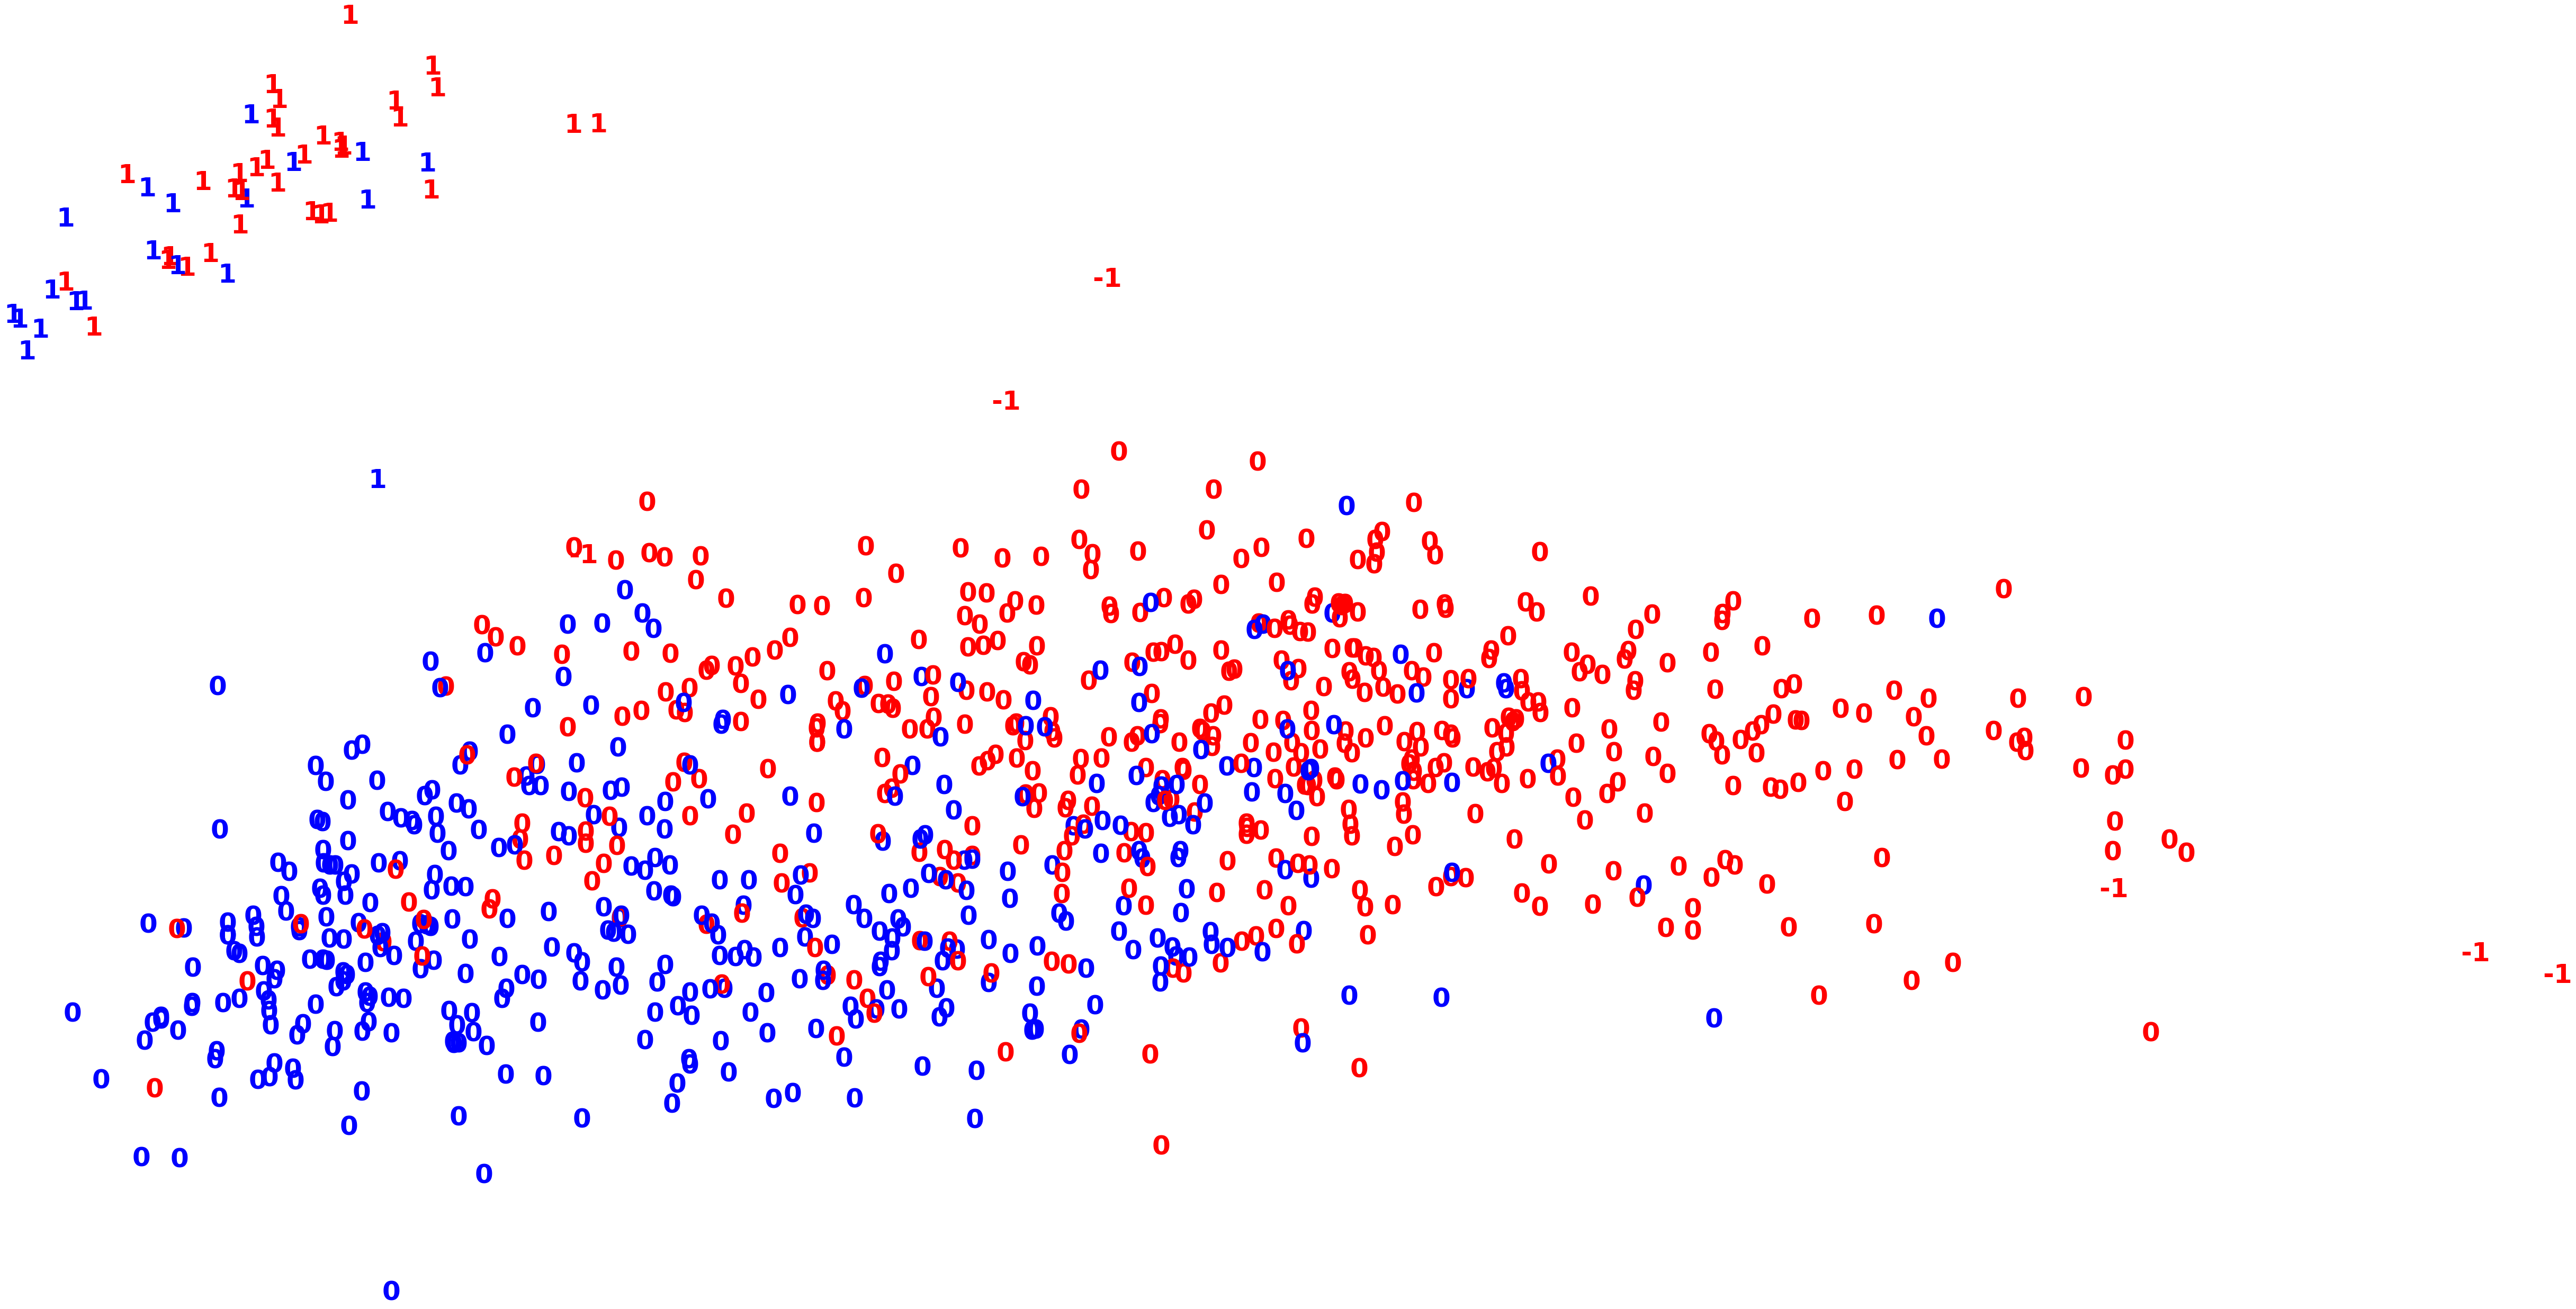

In [193]:
# epsilon ve min samples parametreleri ile kumeleme nesnesi olustur
dbscan_cluster = DBSCAN(eps=3.5, min_samples=8)
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

#### ***ARI skoru***

In [29]:
best_ari_score = 0
best_eps = 1
best_min_samples = 5
best_cluster_n = 1
for e in np.arange(1,4,0.5):
    for m in range(3,20):
        ari_score, _, _, cluster_n = cluster_n_score(e,m)
        if ari_score>best_ari_score:
            best_ari_score = ari_score
            best_eps = e
            best_min_samples = m
            best_cluster_n = cluster_n

print('En iyi ARI skoru     : {}'.format(best_ari_score))
print('En iyi epsilon       : {}'.format(best_eps))   
print('En iyi min_samples   : {}'.format(best_min_samples))  
print('Kume sayisi          : {}'.format(best_cluster_n)) 

En iyi ARI skoru     : 0.10863241264816177
En iyi epsilon       : 2.0
En iyi min_samples   : 4
Kume sayisi          : 9


- Kumeleme grafigi.

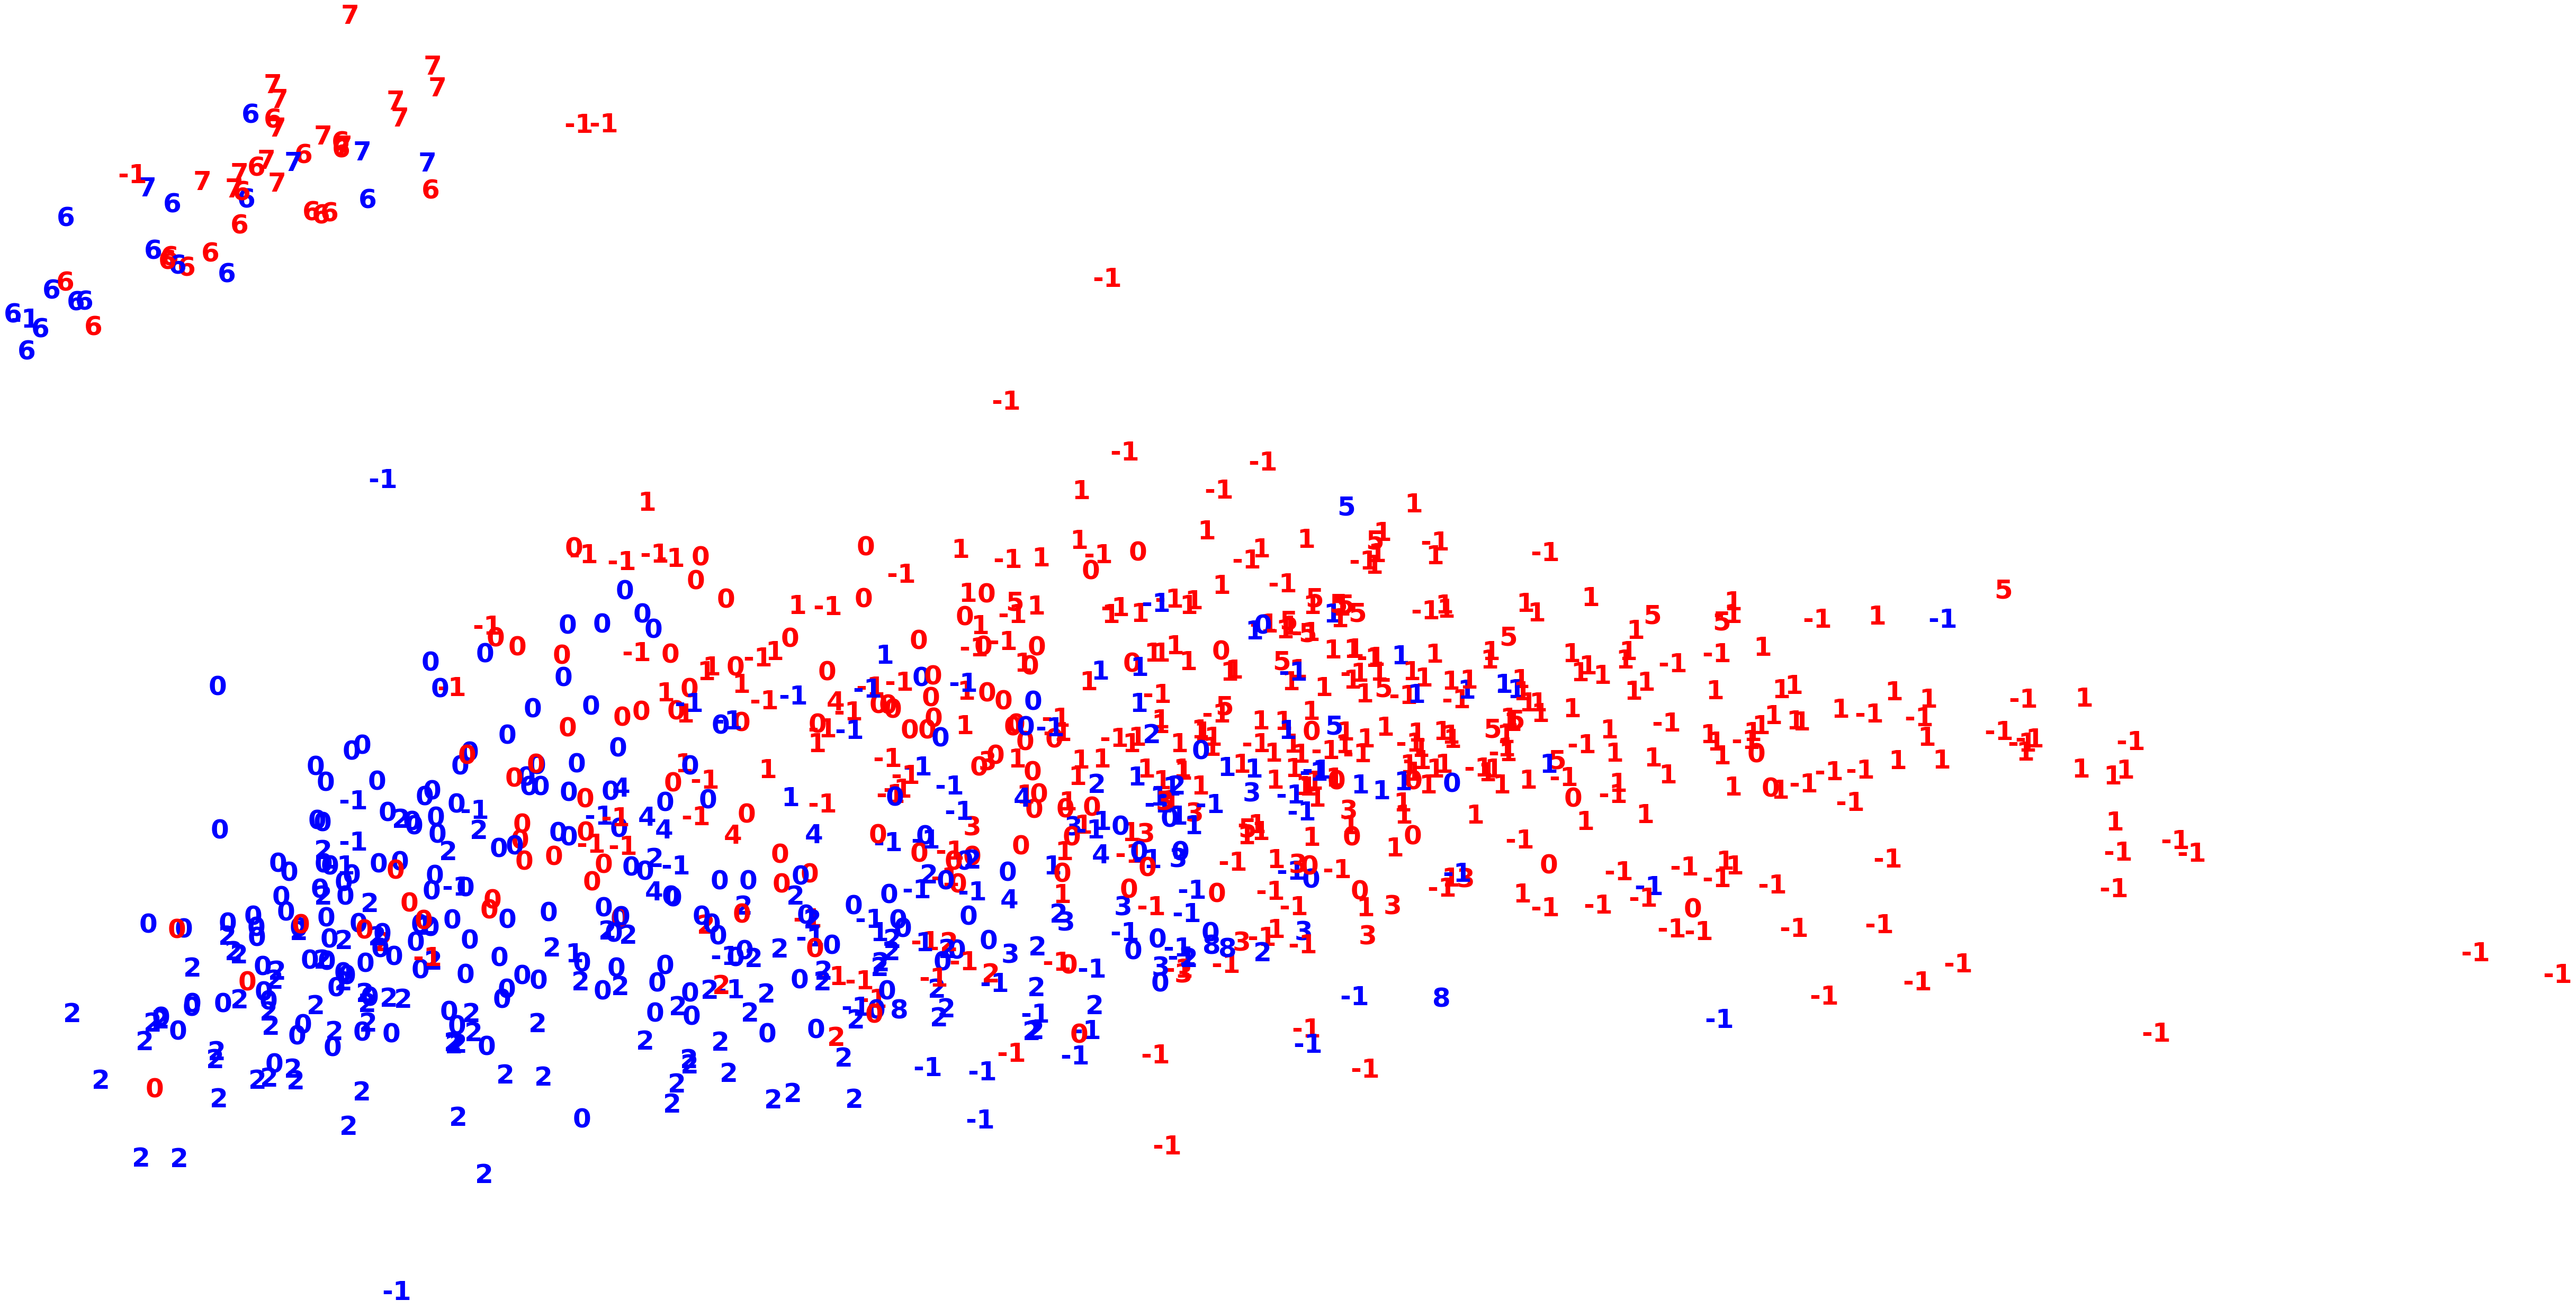

In [178]:
# epsilon ve min samples parametreleri ile kumeleme nesnesi olustur
dbscan_cluster = DBSCAN(eps=2, min_samples=4)
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

---
#### ***min_samples parametresinin etkisi***

- eps 1 de sabit tutularak min_samples artirilacak ve bu artisini kumelemeye etkisi degerlendirilecektir.

In [33]:
ari_scores = []
siluet_scores = []
cluster_counts = []
for min_samples in range(3,30):
    # kume sayisi bire dustugunden siluet skor hata veriyor
    ari, siluet, _, n_cl = cluster_n_score(min_samples=min_samples)  
    cluster_counts.append(n_cl) 
    ari_scores.append(ari)
    siluet_scores.append(siluet)

In [34]:
cluster_df=pd.DataFrame([])
cluster_df['n_clusters']=cluster_counts
cluster_df['min_samples']=np.arange(3,30)
cluster_df['ari_scores']=ari_scores
cluster_df['siluet_scores']=siluet_scores
cluster_df.shape

(27, 4)

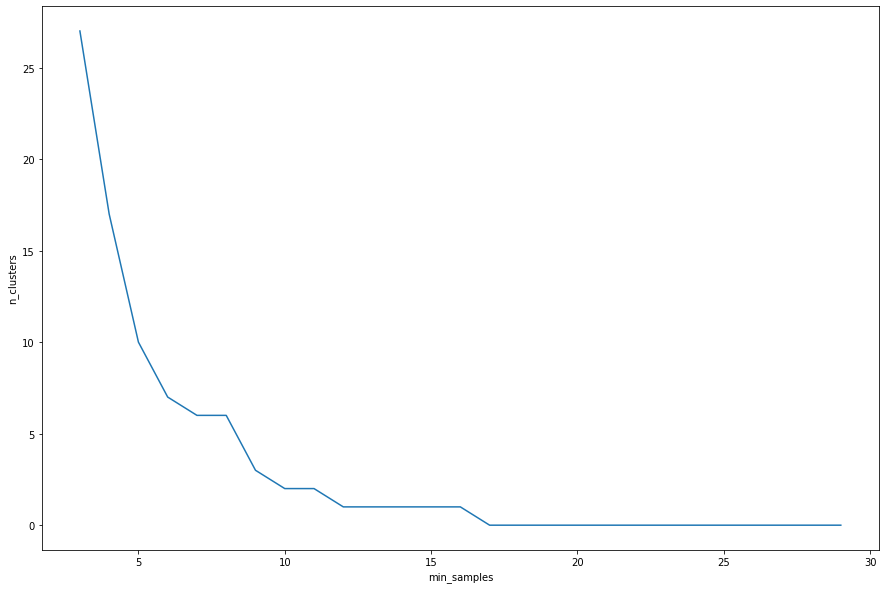

In [35]:
plt.figure(figsize=(15,10))
plt.plot(cluster_df['min_samples'], cluster_df['n_clusters'])
plt.xlabel('min_samples')
plt.ylabel('n_clusters')
plt.show()

- epsilon sabitken (=1) min_samples artririldiginda kume sayisinin exponansiyel olarak azaldigi grafik uzerinde de gorulmektedir.
- Asagidaki grafik de skorlar uzerine etkisi gozukmektedir. min_samples 12 den sonra kume sayisi 1 ya da sifira dustugunden siluet skorun hata vermemesi icin fonksiyon icerisnde -1 degeri dondurulmustu.

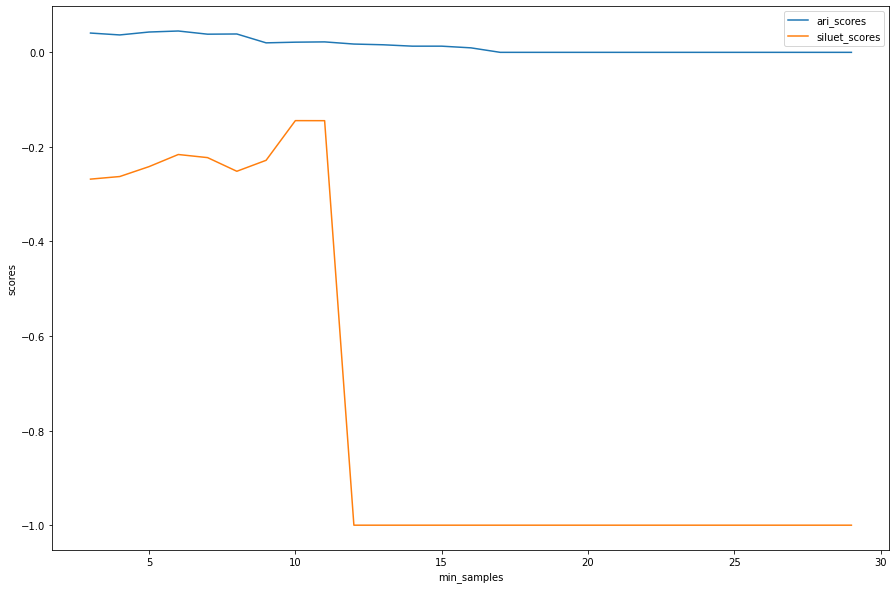

In [36]:
plt.figure(figsize=(15,10))
plt.plot(cluster_df['min_samples'], cluster_df['ari_scores'])
plt.plot(cluster_df['min_samples'], cluster_df['siluet_scores'])
plt.xlabel('min_samples')
plt.ylabel('scores')
plt.legend(['ari_scores', 'siluet_scores'])
plt.show()

---
#### ***epsilon parametresinin etkisi***

- min_samples 5 de sabit tutularak eps artirilacak ve bu artisini kumelemeye etkisi degerlendirilecektir.

In [38]:
ari_scores = []
siluet_scores = []
cluster_counts = []
for eps in np.arange(1,10,0.1):
    ari, siluet, _, n_cl = cluster_n_score(epsilon=eps)  
    cluster_counts.append(n_cl) 
    ari_scores.append(ari)
    siluet_scores.append(siluet)

In [39]:
cluster_df=pd.DataFrame([])
cluster_df['n_clusters']=cluster_counts
cluster_df['epsilon']=np.arange(1,10,0.1)
cluster_df['ari_scores']=ari_scores
cluster_df['siluet_scores']=siluet_scores
cluster_df.shape


(90, 4)

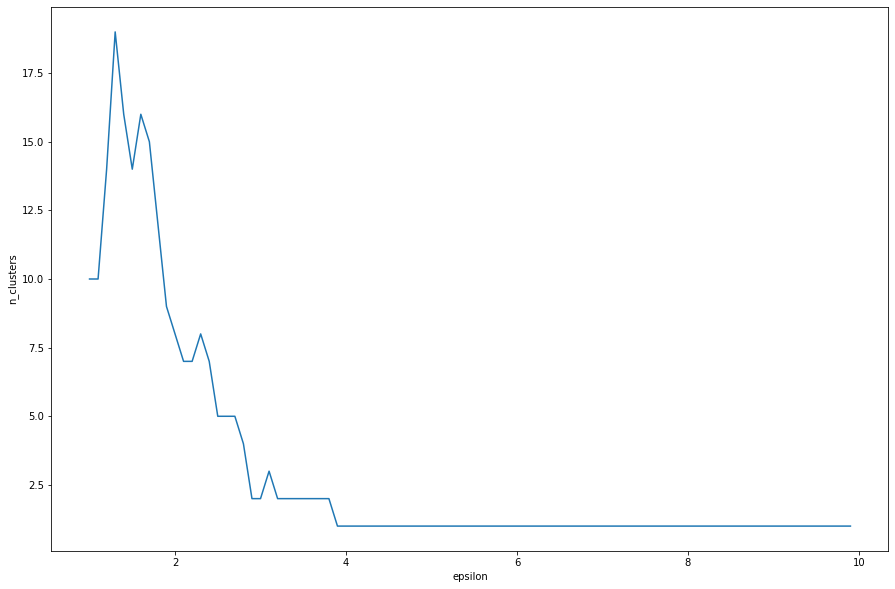

In [40]:
plt.figure(figsize=(15,10))
plt.plot(cluster_df['epsilon'], cluster_df['n_clusters'])
plt.xlabel('epsilon')
plt.ylabel('n_clusters')
plt.show()

- min_samples sabitken (=5) epsilon arttiginda kume sayisinin bazi degerler icin dramatik artis ya da azalisa ugradigi gozukuyor.
- Asagidaki grafik de skorlar uzerine etkisi gozukmektedir. epsilon 4 den sonra kume sayisi 1 ya da sifira dustugunden siluet skorun hata vermemesi icin fonksiyon icerisnde -1 degeri dondurulmustu.

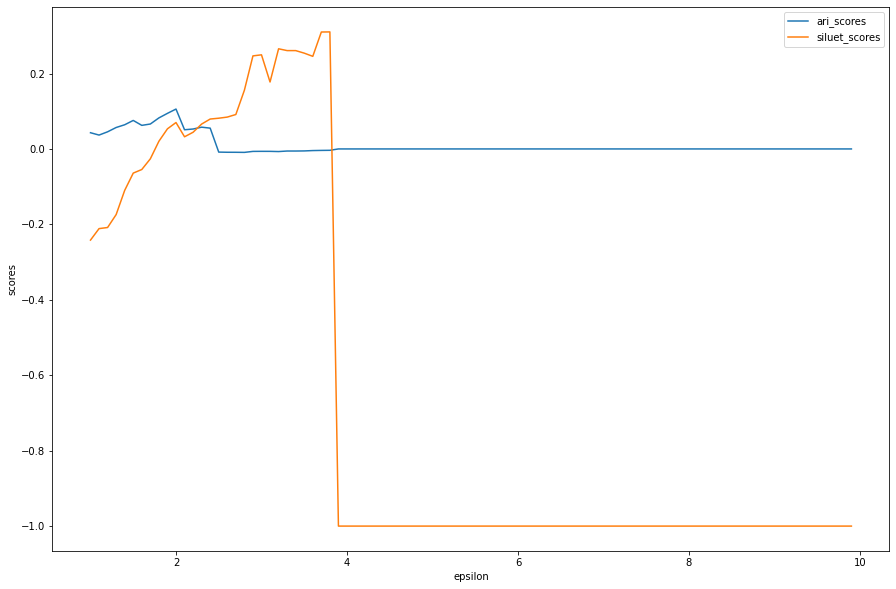

In [41]:
plt.figure(figsize=(15,10))
plt.plot(cluster_df['epsilon'], cluster_df['ari_scores'])
plt.plot(cluster_df['epsilon'], cluster_df['siluet_scores'])
plt.xlabel('epsilon')
plt.ylabel('scores')
plt.legend(['ari_scores', 'siluet_scores'])
plt.show()